In [520]:
import numpy as np
import pandas as pd
from functools import reduce
import datetime


# import scipy.stats as stats

import matplotlib.pyplot as plt
# from scipy.stats import norm
# import datetime

# from datetime import date, timedelta
# from csv import readern
import seaborn as sns
import math as math

import statistics
from statistics import variance
from fractions import Fraction as fr

sns.set()

data sets merged:

- gb
- enroll

In [521]:
nav = pd.read_csv('../data/navigation_events.csv', sep=',')
nav = nav[nav['actor_id'].str.startswith("LEARNER_")]
imgs = nav[nav['event__object_extensions_asset_name'].str.startswith('image')]
image_names = imgs['event__object_extensions_asset_name'].unique()
print(image_names)

data_frames = []
for name in image_names:
    img = nav[nav['event__object_extensions_asset_name'].str.startswith(name)]
    img = img.groupby('actor_id').size().rename_axis('actor_id').reset_index(name=name)
    img = img6.rename(columns={'actor_id': 'Student'})
    data_frames.append(img)
# len(imgs)

# number of times each learner accessed image006

# nav.groupby('actor_id').size().rename_axis('actor_id').reset_index(name='num_times_accessed_img006')

['image006.png' 'image004.jpg' 'image007.png' 'image005.png'
 'image001.png' 'image018.png' 'image008.png' 'image009.png'
 'image003.png' 'image028.png' 'image015.png' 'image013.png'
 'image010.png' 'image026.png' 'image024.png' 'image023.png'
 'image025.png' 'image016.png' 'image022.png' 'image021.png'
 'image027.png' 'image017.png' 'image014.png' 'image011.png'
 'image019.png' 'image030.png' 'image005.jpg' 'image001.jpg'
 'image003.jpg' 'image020.png' 'image004.png' 'image002.jpg'
 'image012.png' 'image029.png']


In [522]:
nav[nav['event__object_extensions_asset_name'].str.startswith('image004.jpg')]

,type,action,event_time,session_id,membership_role,membership_type,event__id,event__type,event__actor_type,event__action,...,event__object_extensions_http_method,event__eventTime,event__edApp_type,event__session_type,object_id_type,event__object_id_type,event__attachment_type,object_id,event__object_extensions_asset_name,actor_id
68,NavigationEvent,navigatedto,2033-03-25 12:44:29.094000+00:00,27030305d8073da39b08438b51b25877,"[""Learner""]",Membership,23779170b0eb849f00116c9e1e43e461,NavigationEvent,Person,NavigatedTo,...,GET,2033-03-25 12:44:29.094000+00:00,SoftwareApplication,Session,attachment,attachment,jpg,071ad0d80cbc232cf74b72681bc77abf,image004.jpg,LEARNER_1
69,NavigationEvent,navigatedto,2033-03-25 12:50:31.507000+00:00,27030305d8073da39b08438b51b25877,"[""Learner""]",Membership,e3def977c6c5c137aef9664c69797c53,NavigationEvent,Person,NavigatedTo,...,GET,2033-03-25 12:50:31.507000+00:00,SoftwareApplication,Session,attachment,attachment,jpg,071ad0d80cbc232cf74b72681bc77abf,image004.jpg,LEARNER_1
70,NavigationEvent,navigatedto,2033-02-08 11:28:36.972000+00:00,a70766f3ab1e2f7a45f55d9d4cb5b81c,"[""Learner""]",Membership,5cd3a0737f845196830c61cb716fee9b,NavigationEvent,Person,NavigatedTo,...,GET,2033-02-08 11:28:36.972000+00:00,SoftwareApplication,Session,attachment,attachment,jpg,071ad0d80cbc232cf74b72681bc77abf,image004.jpg,LEARNER_1
71,NavigationEvent,navigatedto,2033-02-08 11:07:04.856000+00:00,a70766f3ab1e2f7a45f55d9d4cb5b81c,"[""Learner""]",Membership,b864d77a215582fd98ea641a52eff1ab,NavigationEvent,Person,NavigatedTo,...,GET,2033-02-08 11:07:04.856000+00:00,SoftwareApplication,Session,attachment,attachment,jpg,071ad0d80cbc232cf74b72681bc77abf,image004.jpg,LEARNER_1
72,NavigationEvent,navigatedto,2033-05-26 03:10:40.536000+00:00,1727f757478aacf0909814302c373d45,"[""Learner""]",Membership,e0cbf60764d87e333a8fc26a7884a440,NavigationEvent,Person,NavigatedTo,...,GET,2033-05-26 03:10:40.536000+00:00,SoftwareApplication,Session,attachment,attachment,jpg,071ad0d80cbc232cf74b72681bc77abf,image004.jpg,LEARNER_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62797,NavigationEvent,navigatedto,2033-02-15 12:06:41.774000+00:00,83e96d5cf365794256ca3fb1b69e6fdc,"[""Learner""]",Membership,dfd29559cb87a7b7d486469e584f936d,NavigationEvent,Person,NavigatedTo,...,GET,2033-02-15 12:06:41.774000+00:00,SoftwareApplication,Session,attachment,attachment,jpg,071ad0d80cbc232cf74b72681bc77abf,image004.jpg,LEARNER_46
62798,NavigationEvent,navigatedto,2033-02-08 15:50:57.577000+00:00,ea56a813674209ad7537b50cea116c9f,"[""Learner""]",Membership,1b46541d328621b3e9da0b493adb2f43,NavigationEvent,Person,NavigatedTo,...,GET,2033-02-08 15:50:57.577000+00:00,SoftwareApplication,Session,attachment,attachment,jpg,071ad0d80cbc232cf74b72681bc77abf,image004.jpg,LEARNER_46
62808,NavigationEvent,navigatedto,2033-01-10 09:47:48.167000+00:00,7119149bda072c4913baf9ea6e237ee6,"[""Learner""]",Membership,6479f88faa7fe4a237de4c4690d8814e,NavigationEvent,Person,NavigatedTo,...,GET,2033-01-10 09:47:48.167000+00:00,SoftwareApplication,Session,attachment,attachment,jpg,071ad0d80cbc232cf74b72681bc77abf,image004.jpg,LEARNER_47
62809,NavigationEvent,navigatedto,2033-01-09 05:47:26.648000+00:00,c6707410cd346c60ec7a601d6c74db86,"[""Learner""]",Membership,1374b5a95de3efe2abd0f4a6a66ceb7c,NavigationEvent,Person,NavigatedTo,...,GET,2033-01-09 05:47:26.648000+00:00,SoftwareApplication,Session,attachment,attachment,jpg,071ad0d80cbc232cf74b72681bc77abf,image004.jpg,LEARNER_47


In [523]:
disc = pd.read_csv('../data/additional/discussions.csv', sep=',')
# print(disc['discussion_topic_title'].unique())

# time vs. avg post-message length
# time vs 
# print(disc.shape)
disc = disc[disc['actor_id'].str.startswith("LEARNER_")]
disc

,actor_id,membership_role,timestamp,post_id,post_parent_id,discussion_topic_title,discussion_topic_id,discussion_topic_message_length,post_message_length,count_of_likes
2,LEARNER_3,"[""Learner""]",2033-01-28 06:55:40+00:00,abb6c24171f8b195cf0d050858e4ff18,cf6816ae103ab5e2c82d6595eb49e02e,Assignment 1 Discussion forum,132f3fab56d60839d727b966a76c1b1e,79,564,0
3,LEARNER_11,"[""Learner""]",2033-01-29 01:04:32+00:00,a250f9cde1c58d4dba3d4f918e82a018,abb6c24171f8b195cf0d050858e4ff18,Assignment 1 Discussion forum,132f3fab56d60839d727b966a76c1b1e,79,174,0
4,LEARNER_3,"[""Learner""]",2033-01-29 05:54:31+00:00,3ac8537702d3d7d8bf033d73a4491591,a250f9cde1c58d4dba3d4f918e82a018,Assignment 1 Discussion forum,132f3fab56d60839d727b966a76c1b1e,79,226,0
6,LEARNER_10,"[""Learner""]",2033-01-29 13:25:29+00:00,8f5bc168b63565c0342a1059130c660e,cf6816ae103ab5e2c82d6595eb49e02e,Assignment 1 Discussion forum,132f3fab56d60839d727b966a76c1b1e,79,408,0
7,LEARNER_37,"[""Learner""]",2033-01-29 21:15:25+00:00,f0cb6bb384699139d27bcfa90fd65a4d,cf6816ae103ab5e2c82d6595eb49e02e,Assignment 1 Discussion forum,132f3fab56d60839d727b966a76c1b1e,79,1409,0
...,...,...,...,...,...,...,...,...,...,...
1604,LEARNER_13,"[""Learner""]",2033-03-23 11:50:00+00:00,eb48f8a967293433043fa5ce40e1545e,d6fe64dc8c4e1ede591ff45a98e7255c,Q&A with Guest Speaker,3bc2d8a4ae8dfa21b926bc34599560e2,332,595,0
1605,LEARNER_31,"[""Learner""]",2033-03-23 12:05:59+00:00,8417cf39fd9bca3d6a450ad37d249038,d6fe64dc8c4e1ede591ff45a98e7255c,Q&A with Guest Speaker,3bc2d8a4ae8dfa21b926bc34599560e2,332,316,0
1606,LEARNER_19,"[""Learner""]",2033-03-23 15:59:20+00:00,7a91b20369b9853e87f56d13600bb2a5,d6fe64dc8c4e1ede591ff45a98e7255c,Q&A with Guest Speaker,3bc2d8a4ae8dfa21b926bc34599560e2,332,1100,0
1608,LEARNER_14,"[""Learner""]",2033-03-24 10:01:51+00:00,a1210d7d04b9dc8555f53e773af18a28,d6fe64dc8c4e1ede591ff45a98e7255c,Q&A with Guest Speaker,3bc2d8a4ae8dfa21b926bc34599560e2,332,611,0


In [524]:
assignments = pd.read_csv('../data/additional/assignments.csv', sep=',')
assignments

,id,due_at,unlock_at,lock_at,points_possible,grading_type,position,name,submission_types,has_submitted_submissions,workflow_state,published
0,c81f04547a95da2a7b88054ef491b7c4,2033-02-05 20:06:09+00:00,NaN,NaN,100,points,1,Assignment 1,['online_upload'],True,published,True
1,e5913deca98a20cf4dc4658b53168732,2033-02-05 20:06:09+00:00,NaN,NaN,100,points,2,Assignment 1 Copy,['online_upload'],False,unpublished,False
2,a4dc11e7e79361fc5886a9078aac66b8,2033-03-05 20:06:09+00:00,NaN,NaN,100,points,1,Assignment 2,['online_upload'],True,published,True
3,811d93ea379b5cdd5a19f1b5dbab88cd,2033-04-09 19:06:09+00:00,NaN,NaN,100,points,2,Assignment 3 (option A),['online_upload'],True,published,True
4,df8d1f1ff3f48fdc24a278b40c5f45cc,2033-04-09 19:06:09+00:00,NaN,NaN,100,points,3,Assignment 3 (option B),['online_upload'],True,published,True
5,bb971b36c1578cede00150acda89aa99,2033-04-09 19:06:09+00:00,NaN,NaN,100,points,4,Assignment 3 (option C),['online_upload'],True,published,True
6,f1ad954cd2cddda6e17f6fc225d1aa3e,2033-04-09 19:06:09+00:00,NaN,NaN,100,points,5,Assignment 3 (option D),['online_upload'],True,published,True
7,5965e0b0c712861d0efdd9be54572114,NaN,NaN,NaN,10,points,1,Participation grade: Formative (not included i...,['none'],False,unpublished,False
8,067f62cae2a61d43712cc7c84f1eb08a,NaN,NaN,NaN,10,points,2,Participation grade: Summative,['none'],False,published,True


In [525]:
gb = pd.read_csv('../data/additional/gradebook.csv', sep=',', skiprows=range(1, 3))
gb

,Student,Assignment 1 (c81f04547a95da2a7b88054ef491b7c4),Assignment 2 (a4dc11e7e79361fc5886a9078aac66b8),Assignment 3 (option A) (811d93ea379b5cdd5a19f1b5dbab88cd),Assignment 3 (option B) (df8d1f1ff3f48fdc24a278b40c5f45cc),Assignment 3 (option C) (bb971b36c1578cede00150acda89aa99),Assignment 3 (option D) (f1ad954cd2cddda6e17f6fc225d1aa3e),Participation grade: Formative (not included in final grade) (5965e0b0c712861d0efdd9be54572114),Assignment 1 Current Score,Assignment 2 Current Score,Assignment 3 Current Score,Participation & engagement Current Score,Current Score
0,LEARNER_4,88,76.0,75.0,NaN,NaN,NaN,10.0,88,76.0,75.0,100.0,82.9
1,LEARNER_10,88,72.0,74.0,NaN,NaN,NaN,8.5,88,72.0,74.0,85.0,78.4
2,LEARNER_34,90,78.0,73.0,NaN,NaN,NaN,9.0,90,78.0,73.0,90.0,81.3
3,LEARNER_16,88,71.0,NaN,NaN,77.0,NaN,10.0,88,71.0,77.0,100.0,82.0
4,LEARNER_7,92,83.0,NaN,NaN,80.0,NaN,10.0,92,83.0,80.0,100.0,87.3
5,LEARNER_30,77,89.0,NaN,NaN,74.0,NaN,7.0,77,89.0,74.0,70.0,78.3
6,LEARNER_15,90,79.0,75.0,NaN,NaN,NaN,6.0,90,79.0,75.0,60.0,76.2
7,LEARNER_19,90,83.0,NaN,NaN,81.0,NaN,9.0,90,83.0,81.0,90.0,85.2
8,LEARNER_36,56,84.0,75.0,NaN,NaN,NaN,6.0,56,84.0,75.0,60.0,70.9
9,LEARNER_8,90,88.0,74.0,NaN,NaN,NaN,8.5,90,88.0,74.0,85.0,83.6


In [526]:
enr = pd.read_csv('../data/additional/enrollments.csv', sep=',')
enr

,user_id,type,last_activity_at,last_attended_at,total_activity_time
0,LEARNER_10,StudentEnrollment,2033-04-27 05:55:39+00:00,NaN,421763
1,LEARNER_7,StudentEnrollment,2033-04-27 06:25:33+00:00,NaN,2025102
2,LEARNER_8,StudentEnrollment,2033-04-28 04:21:40+00:00,NaN,1036998
3,LEARNER_20,StudentEnrollment,2033-05-18 01:43:47+00:00,NaN,201541
4,LEARNER_13,StudentEnrollment,2033-06-05 14:42:45+00:00,NaN,774430
5,LEARNER_37,StudentEnrollment,2033-05-05 13:00:26+00:00,NaN,862185
6,LEARNER_23,StudentEnrollment,2033-04-29 09:59:40+00:00,NaN,698439
7,LEARNER_14,StudentEnrollment,2033-04-27 14:18:30+00:00,NaN,155823
8,LEARNER_35,StudentEnrollment,2033-04-24 10:33:50+00:00,NaN,209140
9,LEARNER_11,StudentEnrollment,2033-05-15 00:38:06+00:00,NaN,285214


In [534]:
# data_frames = []
# for name in image_names:
#     nav = nav[nav['event__object_extensions_asset_name'].str.startswith(name)]
#     img = nav.groupby('actor_id').size().rename_axis('actor_id').reset_index(name=name)
#     img = img6.rename(columns={'actor_id': 'Student'})
#     data_frames.append(img)

enr = pd.read_csv('../data/additional/enrollments.csv', sep=',')
enr2 = enr.rename(columns={'user_id': 'Student'})

# disc_count
disc = pd.read_csv('../data/additional/discussions.csv', sep=',')
disc = disc[disc['actor_id'].str.startswith("LEARNER_")]
disc_count = disc[['actor_id']]
disc_count = disc_count.value_counts().rename_axis('actor_id').reset_index(name='disc_count')
disc_count = disc_count.rename(columns={'actor_id': 'Student'})

# mean post_message_length
disc_post_length = disc[['actor_id', 'post_message_length']]
disc_post_length = disc_post_length.groupby('actor_id').mean().reset_index()
disc_post_length = disc_post_length.rename(columns={'actor_id': 'Student', 'post_message_length': 'avg_post_message_length'})

# total likes from posts
total_likes = disc[['actor_id', 'count_of_likes']]
total_likes = total_likes.groupby('actor_id').sum().reset_index()
total_likes = total_likes.rename(columns={'actor_id': 'Student', 'count_of_likes': 'total_likes'})


# number of times each learner accessed image006
# nav = pd.read_csv('../data/navigation_events.csv', sep=',')
# nav = nav[nav['actor_id'].str.startswith("LEARNER_")]
# nav = nav[nav['event__object_extensions_asset_name'].str.startswith('image006.png')]
# img6 = nav.groupby('actor_id').size().rename_axis('actor_id').reset_index(name='num_times_accessed_img006')
# img6 = img6.rename(columns={'actor_id': 'Student'})

# avg num of posts per discussion topic
nav = pd.read_csv('../data/navigation_events.csv', sep=',')
total = nav[['actor_id']]
total2 = total.value_counts().rename_axis('actor_id').reset_index(name='nav_count')
total2 = total2[total2['actor_id'].str.startswith("LEARNER_")]
total2 = total2.rename(columns={'actor_id': 'Student'})

gb = pd.read_csv('../data/additional/gradebook.csv', sep=',', skiprows=range(1, 3))

data_frames = [enr2, gb, total2, disc_count, disc_post_length, total_likes]

nav = pd.read_csv('../data/navigation_events.csv', sep=',')
nav = nav[nav['actor_id'].str.startswith("LEARNER_")]
imgs = nav[nav['event__object_extensions_asset_name'].str.startswith('image')]
image_names = imgs['event__object_extensions_asset_name'].unique()
# print(len(image_names))

for name in image_names:
    img = imgs[imgs['event__object_extensions_asset_name'].str.startswith(name)]
    img = img.groupby('actor_id').size().rename_axis('actor_id').reset_index(name=name)
    img = img.rename(columns={'actor_id': 'Student'})
    data_frames.append(img)

df = reduce(lambda  left,right: pd.merge(left,right,on=['Student'],
                                            how='outer'), data_frames)

df = df.sort_values(by='Student', key=lambda col: col.str[8:].astype(int))
df = df.loc[df['type'] == 'StudentEnrollment']
df = df.drop(['type', 'last_attended_at'], axis=1)

df


# plt.figure()

# sns.scatterplot(data = df, x='num_times_accessed_img006', y = 'Current Score')


,Student,last_activity_at,total_activity_time,Assignment 1 (c81f04547a95da2a7b88054ef491b7c4),Assignment 2 (a4dc11e7e79361fc5886a9078aac66b8),Assignment 3 (option A) (811d93ea379b5cdd5a19f1b5dbab88cd),Assignment 3 (option B) (df8d1f1ff3f48fdc24a278b40c5f45cc),Assignment 3 (option C) (bb971b36c1578cede00150acda89aa99),Assignment 3 (option D) (f1ad954cd2cddda6e17f6fc225d1aa3e),Participation grade: Formative (not included in final grade) (5965e0b0c712861d0efdd9be54572114),...,image019.png,image030.png,image005.jpg,image001.jpg,image003.jpg,image020.png,image004.png,image002.jpg,image012.png,image029.png
30,LEARNER_1,2033-05-26 03:10:40+00:00,985351.0,79.0,84.0,NaN,NaN,73.0,NaN,9.0,...,13.0,1.0,1.0,1.0,1.0,9.0,NaN,NaN,NaN,NaN
11,LEARNER_2,2033-09-15 13:24:28+00:00,152876.0,93.0,85.0,NaN,NaN,NaN,95.0,6.0,...,6.0,3.0,6.0,8.0,6.0,11.0,2.0,16.0,NaN,NaN
13,LEARNER_3,2033-04-27 00:46:59+00:00,209706.0,94.0,92.0,NaN,NaN,82.0,NaN,9.0,...,11.0,5.0,5.0,10.0,7.0,2.0,2.0,3.0,NaN,NaN
19,LEARNER_4,2033-05-08 08:56:27+00:00,675638.0,88.0,76.0,75.0,NaN,NaN,NaN,10.0,...,14.0,6.0,5.0,10.0,5.0,4.0,3.0,2.0,NaN,NaN
15,LEARNER_5,2033-05-27 04:17:06+00:00,177844.0,91.0,82.0,84.0,NaN,NaN,NaN,10.0,...,2.0,1.0,1.0,6.0,3.0,2.0,4.0,1.0,NaN,NaN
31,LEARNER_6,2033-05-10 10:22:54+00:00,426200.0,94.0,94.0,NaN,84.0,NaN,NaN,10.0,...,11.0,9.0,10.0,9.0,5.0,1.0,4.0,4.0,NaN,NaN
1,LEARNER_7,2033-04-27 06:25:33+00:00,2025102.0,92.0,83.0,NaN,NaN,80.0,NaN,10.0,...,10.0,2.0,6.0,12.0,11.0,7.0,4.0,8.0,NaN,NaN
2,LEARNER_8,2033-04-28 04:21:40+00:00,1036998.0,90.0,88.0,74.0,NaN,NaN,NaN,8.5,...,17.0,13.0,12.0,19.0,13.0,5.0,2.0,3.0,NaN,NaN
0,LEARNER_10,2033-04-27 05:55:39+00:00,421763.0,88.0,72.0,74.0,NaN,NaN,NaN,8.5,...,3.0,3.0,NaN,4.0,5.0,2.0,4.0,2.0,NaN,NaN
9,LEARNER_11,2033-05-15 00:38:06+00:00,285214.0,90.0,79.0,NaN,NaN,82.0,NaN,9.0,...,11.0,1.0,1.0,9.0,7.0,1.0,7.0,2.0,NaN,NaN


In [544]:
df.corr()

,total_activity_time,Assignment 1 (c81f04547a95da2a7b88054ef491b7c4),Assignment 2 (a4dc11e7e79361fc5886a9078aac66b8),Assignment 3 (option A) (811d93ea379b5cdd5a19f1b5dbab88cd),Assignment 3 (option B) (df8d1f1ff3f48fdc24a278b40c5f45cc),Assignment 3 (option C) (bb971b36c1578cede00150acda89aa99),Assignment 3 (option D) (f1ad954cd2cddda6e17f6fc225d1aa3e),Participation grade: Formative (not included in final grade) (5965e0b0c712861d0efdd9be54572114),Assignment 1 Current Score,Assignment 2 Current Score,...,image019.png,image030.png,image005.jpg,image001.jpg,image003.jpg,image020.png,image004.png,image002.jpg,image012.png,image029.png
total_activity_time,1.000000,-0.015322,0.058256,0.275213,0.122836,-0.138574,NaN,0.127059,-0.015322,0.058256,...,0.062206,0.089693,0.166573,0.233229,0.303027,0.031091,-0.105550,0.015357,NaN,-0.960256
Assignment 1 (c81f04547a95da2a7b88054ef491b7c4),-0.015322,1.000000,0.152822,0.184900,0.992778,0.786424,NaN,0.495404,1.000000,0.152822,...,-0.306558,0.316799,0.277128,0.446377,0.475178,-0.158115,-0.167771,0.163057,NaN,0.277350
Assignment 2 (a4dc11e7e79361fc5886a9078aac66b8),0.058256,0.152822,1.000000,0.343814,0.956654,0.035470,NaN,0.115440,0.152822,1.000000,...,0.072748,0.272657,0.253540,-0.026149,-0.104852,-0.054079,0.075089,0.190714,NaN,0.534450
Assignment 3 (option A) (811d93ea379b5cdd5a19f1b5dbab88cd),0.275213,0.184900,0.343814,1.000000,NaN,NaN,NaN,0.451538,0.184900,0.343814,...,-0.150082,-0.198597,-0.311604,0.005466,0.032564,-0.199509,-0.098837,-0.052797,NaN,NaN
Assignment 3 (option B) (df8d1f1ff3f48fdc24a278b40c5f45cc),0.122836,0.992778,0.956654,NaN,1.000000,NaN,NaN,-0.211604,0.992778,0.956654,...,0.992778,-1.000000,-1.000000,-1.000000,-1.000000,0.392494,0.977356,1.000000,NaN,NaN
Assignment 3 (option C) (bb971b36c1578cede00150acda89aa99),-0.138574,0.786424,0.035470,NaN,NaN,1.000000,NaN,0.608987,0.786424,0.035470,...,-0.278519,0.434562,0.273296,0.836279,0.705888,-0.607486,-0.664290,-0.103925,NaN,NaN
Assignment 3 (option D) (f1ad954cd2cddda6e17f6fc225d1aa3e),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Participation grade: Formative (not included in final grade) (5965e0b0c712861d0efdd9be54572114),0.127059,0.495404,0.115440,0.451538,-0.211604,0.608987,NaN,1.000000,0.495404,0.115440,...,-0.157760,0.336171,0.257049,0.430866,0.446272,-0.353606,-0.082446,-0.172424,NaN,0.500000
Assignment 1 Current Score,-0.015322,1.000000,0.152822,0.184900,0.992778,0.786424,NaN,0.495404,1.000000,0.152822,...,-0.306558,0.316799,0.277128,0.446377,0.475178,-0.158115,-0.167771,0.163057,NaN,0.277350
Assignment 2 Current Score,0.058256,0.152822,1.000000,0.343814,0.956654,0.035470,NaN,0.115440,0.152822,1.000000,...,0.072748,0.272657,0.253540,-0.026149,-0.104852,-0.054079,0.075089,0.190714,NaN,0.534450


/var/folders/b1/pyqy_k653cg6dxt_lt5q5ls40000gn/T/ipykernel_72241/3667480320.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

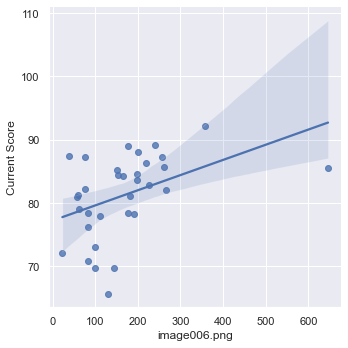

<Figure size 432x288 with 0 Axes>

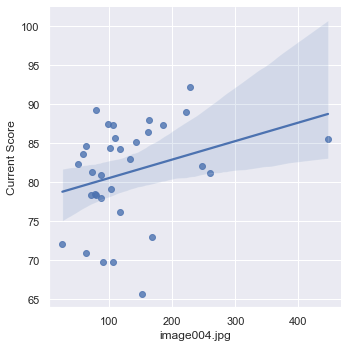

<Figure size 432x288 with 0 Axes>

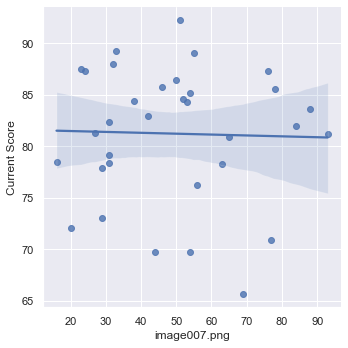

<Figure size 432x288 with 0 Axes>

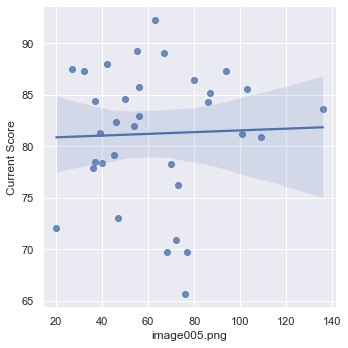

<Figure size 432x288 with 0 Axes>

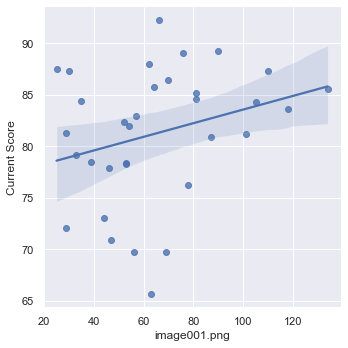

<Figure size 432x288 with 0 Axes>

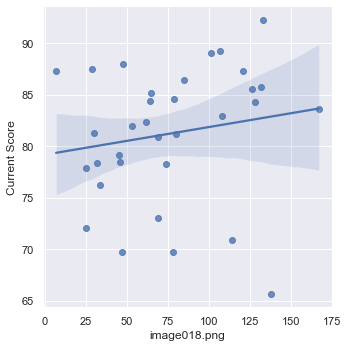

<Figure size 432x288 with 0 Axes>

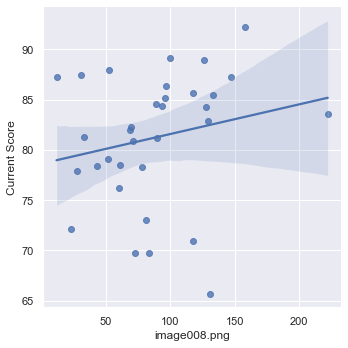

<Figure size 432x288 with 0 Axes>

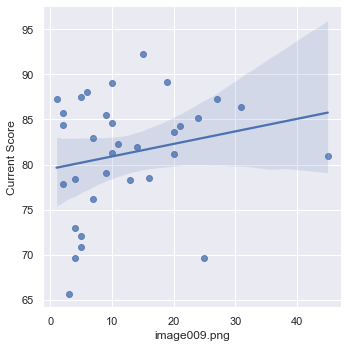

<Figure size 432x288 with 0 Axes>

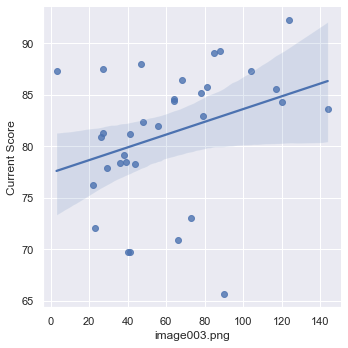

<Figure size 432x288 with 0 Axes>

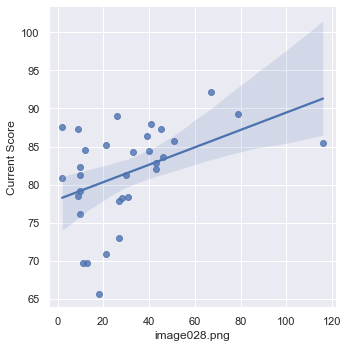

<Figure size 432x288 with 0 Axes>

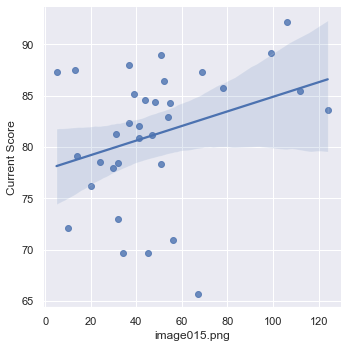

<Figure size 432x288 with 0 Axes>

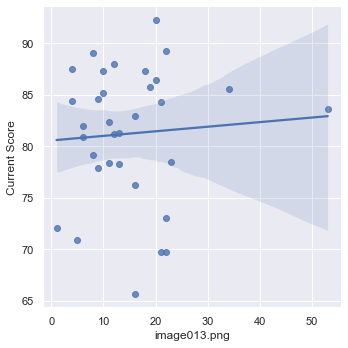

<Figure size 432x288 with 0 Axes>

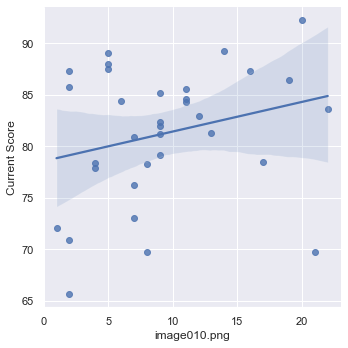

<Figure size 432x288 with 0 Axes>

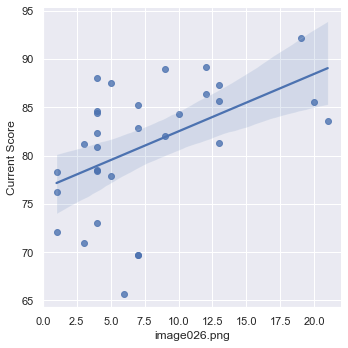

<Figure size 432x288 with 0 Axes>

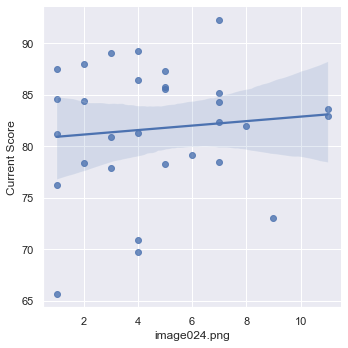

<Figure size 432x288 with 0 Axes>

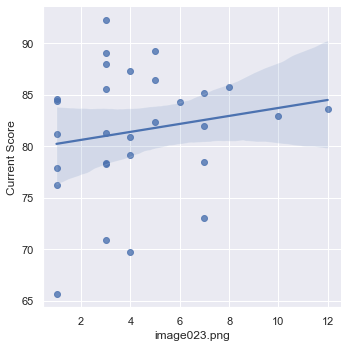

<Figure size 432x288 with 0 Axes>

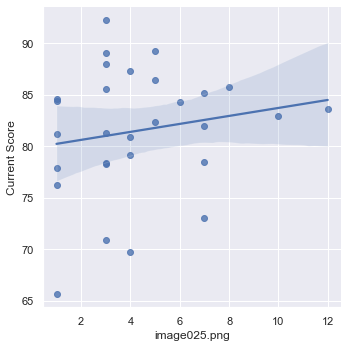

<Figure size 432x288 with 0 Axes>

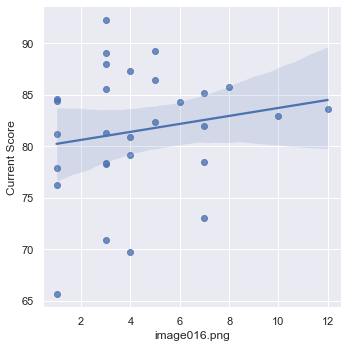

<Figure size 432x288 with 0 Axes>

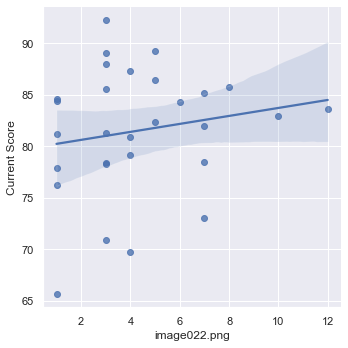

<Figure size 432x288 with 0 Axes>

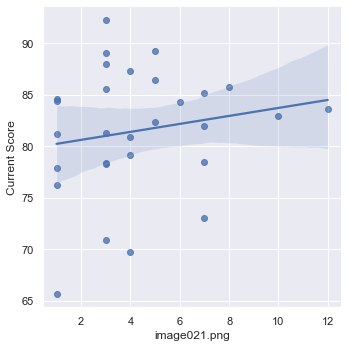

<Figure size 432x288 with 0 Axes>

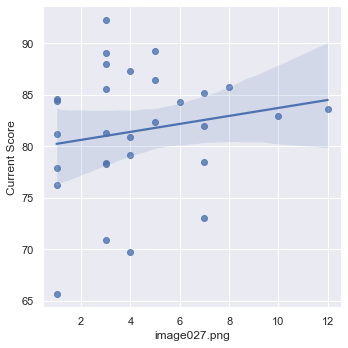

<Figure size 432x288 with 0 Axes>

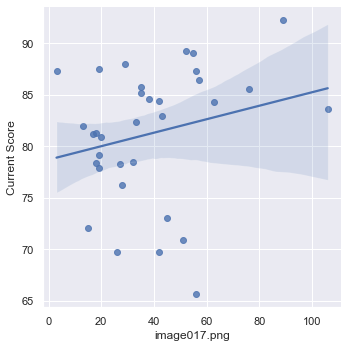

<Figure size 432x288 with 0 Axes>

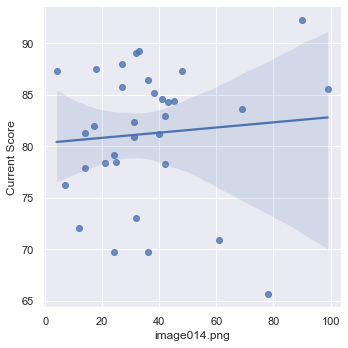

<Figure size 432x288 with 0 Axes>

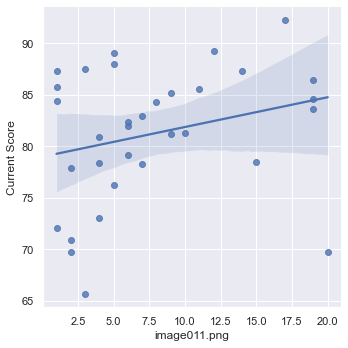

<Figure size 432x288 with 0 Axes>

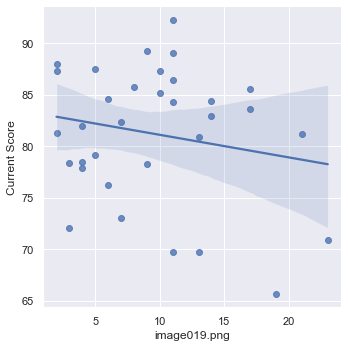

<Figure size 432x288 with 0 Axes>

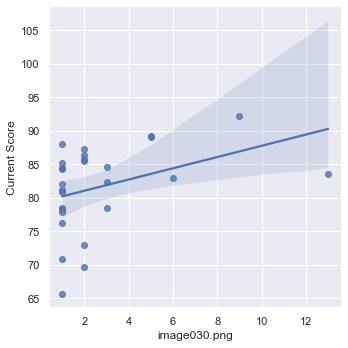

<Figure size 432x288 with 0 Axes>

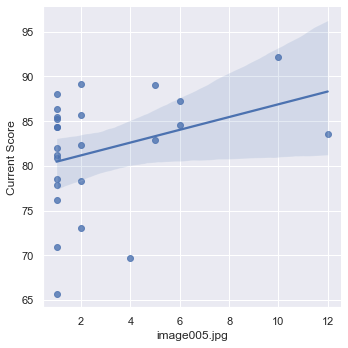

<Figure size 432x288 with 0 Axes>

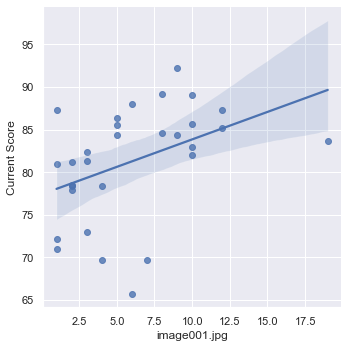

<Figure size 432x288 with 0 Axes>

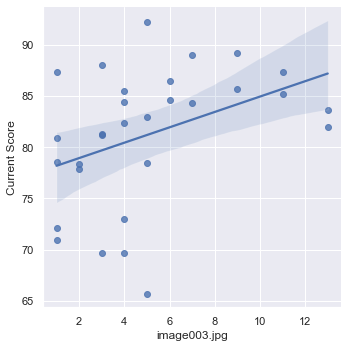

<Figure size 432x288 with 0 Axes>

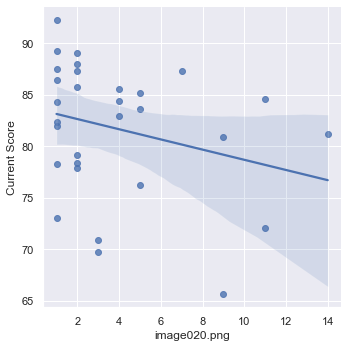

<Figure size 432x288 with 0 Axes>

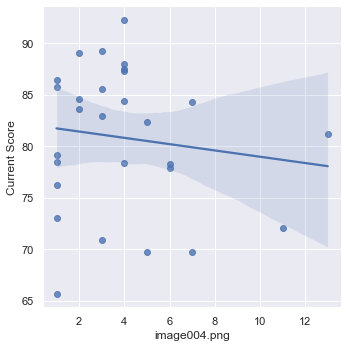

<Figure size 432x288 with 0 Axes>

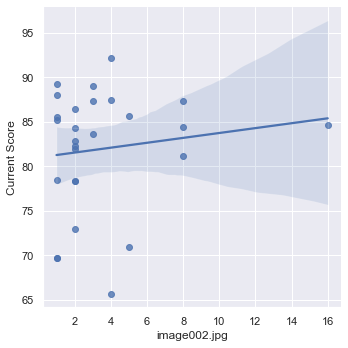

<Figure size 432x288 with 0 Axes>

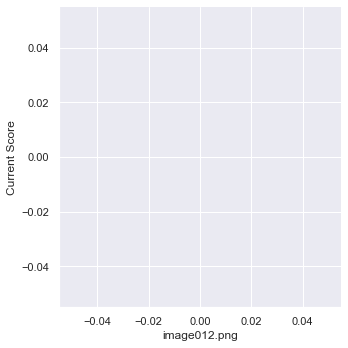

<Figure size 432x288 with 0 Axes>

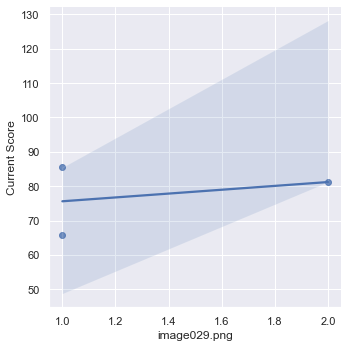

In [543]:

for name in image_names:
    plt.figure()
    sns.lmplot(data = df[[name, 'Current Score']], x=name, y = 'Current Score')


    num  num_students_engaged
0     1                    41
1     2                    41
2     3                    38
3     4                    36
4     5                    36
5     6                    37
6     7                    37
7     8                    34
8     9                    34
9    10                    33
10   11                    34
11   12                    32


/var/folders/b1/pyqy_k653cg6dxt_lt5q5ls40000gn/T/ipykernel_72241/1447050436.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discussions['num'] = discussions[['event__object_extensions_asset_name']].transform(lambda col: col.map(lambda t: int(t.split(':', 1)[0][11:])))


<AxesSubplot:xlabel='num', ylabel='num_students_engaged'>

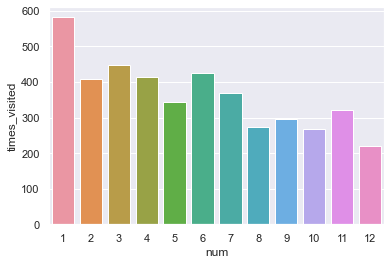

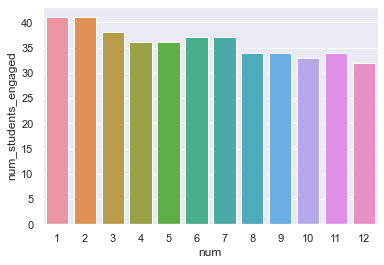

In [528]:
event_action = nav[['actor_id','event__object_extensions_asset_name']]
event_action = event_action[event_action['actor_id'].str.startswith("LEARNER_")]

totaleventact = event_action.value_counts().reset_index()
totaleventact.columns.values[2] = "times_visited"
totaleventact

topics = totaleventact['event__object_extensions_asset_name'].unique()

discussions = totaleventact[totaleventact['event__object_extensions_asset_name'].str.startswith("Discussion")]
discussions['num'] = discussions[['event__object_extensions_asset_name']].transform(lambda col: col.map(lambda t: int(t.split(':', 1)[0][11:])))

discussion_topics = discussions['event__object_extensions_asset_name'].unique()
topic_dict = {}
for t in discussion_topics:
    topic_dict[t] = int(t.split(':', 1)[0][11:])

tms_visited = discussions[['num', 'times_visited']].groupby('num').sum().reset_index()
# tms_visited = tms_visited.sort_values(by='event__object_extensions_asset_name', key=lambda col: col.map(lambda t: int(t.split(':', 1)[0][11:])))
# tms_visited['num'] = tms_visited[['event__object_extensions_asset_name']].transform(lambda col: col.map(lambda t: int(t.split(':', 1)[0][11:])))
# sns.barplot(data = tms_visited, x='num', y = 'times_visited')

# number of times visited image006 for each student

# uniq_learners = discussions.drop_duplicates(subset=['actor_id'])
# print(uniq_learners)
# hi = discussions.groupby(['event__object_extensions_asset_name', 'actor_id'])

# number of students involved



num_students_engaged = discussions.groupby(['num']).size().rename_axis('num').reset_index(name='num_students_engaged')

print(num_students_engaged)

plt.figure()
sns.barplot(data = tms_visited, x='num', y = 'times_visited')
plt.figure()
sns.barplot(data = num_students_engaged, x='num', y = 'num_students_engaged')


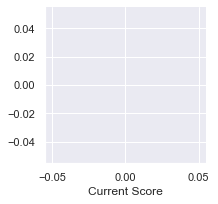

In [541]:
g = sns.FacetGrid(df)
g.map(sns.scatterplot, "Current Score", alpha=.7)
g.add_legend()

<AxesSubplot:xlabel='timestamp'>

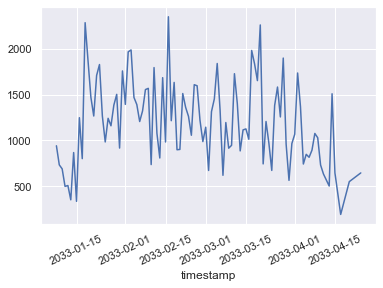

In [529]:
# disc['timestamp'] = disc['timestamp'].map(lambda x: datetime.strptime(date_string, format))
disc['timestamp'] = pd.to_datetime(disc['timestamp'])
disc.dtypes
# disc[['timestamp','post_message_length']].set_index('timestamp').plot()
disc.groupby(disc['timestamp'].dt.date)["post_message_length"].mean().plot(kind="line",rot=25)

In [530]:
# number of posts 

In [531]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

histdata = gb

histdata['A3 option'] = histdata[] "Assignment 3 (option A) (811d93ea379b5cdd5a19f1b5dbab88cd)"

sns.set_theme(style="ticks")

# diamonds = sns.load_dataset("diamonds")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    gb,
    x="Current Score", 
    hue="cut",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])

SyntaxError: invalid syntax (3295158614.py, line 7)